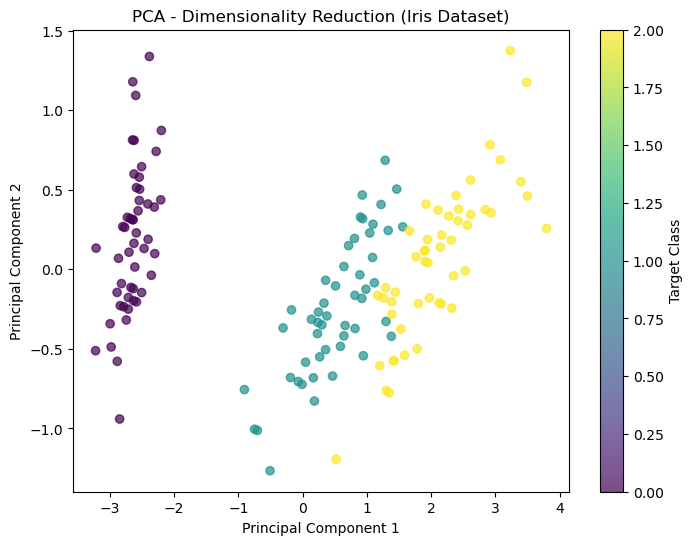

In [1]:
#Part 1: Dimensionality Reduction 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
#load the iris dataset
iris = load_iris()
X = iris.data  # Feature matrix
y = iris.target  # Target labels
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# Convert to DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Target"] = y
# Scatter plot of reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(label="Target Class")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Dimensionality Reduction (Iris Dataset)")
plt.show()

file loaded successfully!


C:\Users\hp\AppData\Local\Temp\ipykernel_3184\1469143644.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Coerce invalid dates to NaT


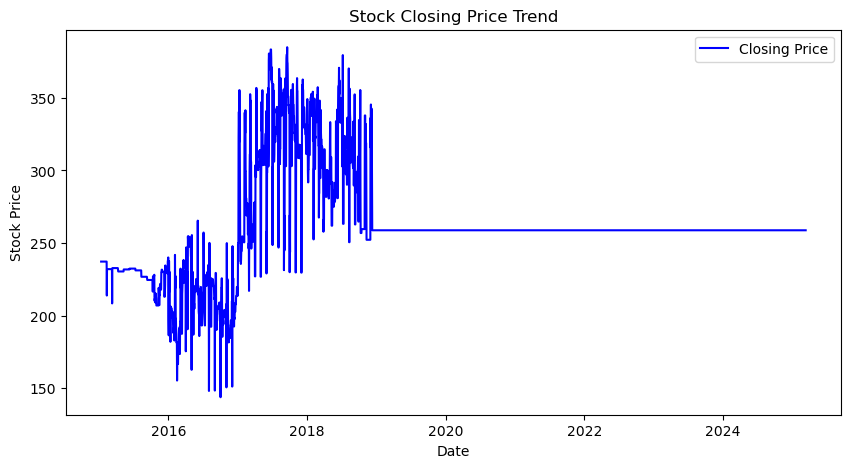

 ARIMA Model Trained Successfully!


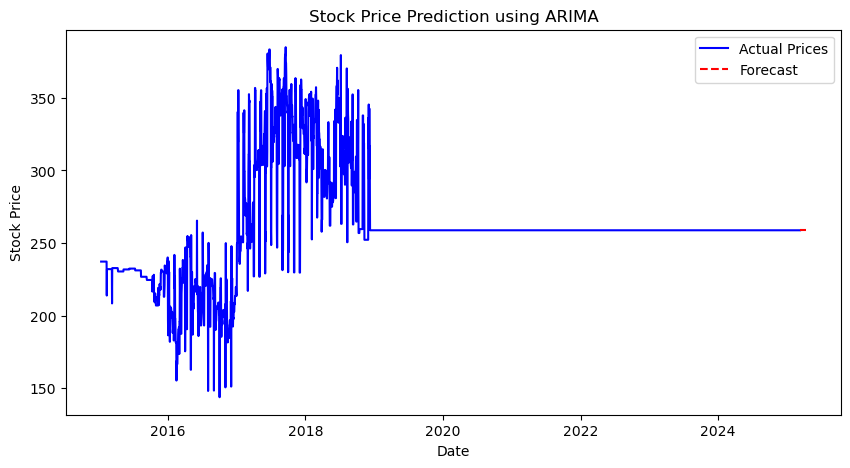

In [3]:
#part 2: stock price predition using time series forcasting
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# step 1: load dATASET
file_path = "C:\\Users\\hp\\Downloads\\tesla-stock-price.csv"
try:
    df = pd.read_csv(file_path)
    print("file loaded successfully!")
except exception as e:
    print("error loading file:{e}")
    exit()

#  Step 2: Clean Column Names
df.columns = df.columns.str.strip()
#  Step 3: Ensure "Date" and "Close" Columns Exist
if "Date" not in df.columns or "Close" not in df.columns:
    print(" Missing 'Date' or 'Close' column. Found:", df.columns)
    exit()

# Step 4: Convert Date Column
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")  # Coerce invalid dates to NaT
df.dropna(subset=["Date"], inplace=True)  # Remove rows with invalid dates

# Step 5: Ensure Dataset Has Enough Data
if df.shape[0] < 50:  # ARIMA needs at least 50 data points
    print(" Not enough data points for ARIMA. Need at least 50, found:", df.shape[0])
    exit()

# Step 6: Sort and Set Date as Index
df = df.sort_values("Date")
df.set_index("Date", inplace=True)
df = df.asfreq("D")  # Set frequency
#  Step 7: Handle Missing Values
df["Close"] = df["Close"].ffill().bfill()  # Fill missing values
# Step 8: Plot Closing Prices
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Closing Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

#  Step 9: Train ARIMA Model (Only If Enough Data)
try:
    model = sm.tsa.ARIMA(df["Close"], order=(5,1,0))
    model_fit = model.fit()
    print(" ARIMA Model Trained Successfully!")
except Exception as e:
    print(f" ARIMA Model Training Error: {e}")
    exit()

# Step 10: Forecast Next 30 Days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 11: Generate Future Dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq="D")[1:]

# Step 12: Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(df["Close"], label="Actual Prices", color='blue')
plt.plot(future_dates, forecast, label="Forecast", linestyle="dashed", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction using ARIMA")
plt.legend()
plt.show()
                    